In [1]:
from LorenzEDMD.dynamical_system.Lorenz import lorenz63
from LorenzEDMD.EDMD.EDMD import perform_edmd_chebyshev, get_spectral_properties, evaluate_koopman_eigenfunctions_batch
from LorenzEDMD.utils.data_processing import normalise_data_chebyshev
import numpy as np
from matplotlib import pyplot as plt

In [2]:
lorenz = lorenz63()
t , X = lorenz.integrate_EM()

In [3]:
scaled_data, data_min, data_max = normalise_data_chebyshev(X)

In [5]:
degree = 6
K, indices = perform_edmd_chebyshev(scaled_data,degree=degree)

EDMD: 100%|██████████| 58999/58999 [00:28<00:00, 2050.44it/s]


In [6]:
eigenvalues, eigenvectors = get_spectral_properties(K)

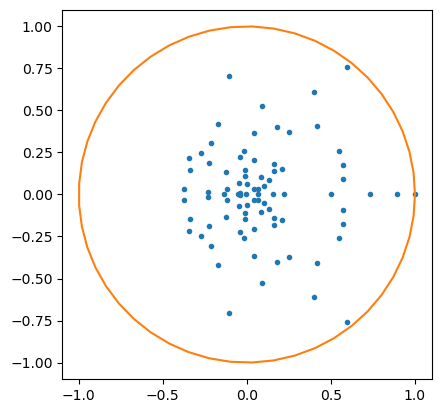

In [7]:
fig, ax = plt.subplots()
thetas = np.linspace(0,2*np.pi)
ax.plot(np.real(eigenvalues),np.imag(eigenvalues),'.')
ax.plot(np.cos(thetas),np.sin(thetas))
ax.set_aspect("equal")

In [8]:
lambdas = np.log(eigenvalues) / ( lorenz.dt * lorenz.tau )

In [ ]:
# scaled_data, data_min, data_max = normalise_data_chebyshev(X)
# phi0 = [get_koopman_eigenfunction(eigenvectors[0],indices,x) for x in scaled_data[:5000,:]] 

In [16]:
Phi = evaluate_koopman_eigenfunctions_batch(scaled_data,indices,eigenvectors[:,0])